# 2019년 11월 27일

In [2]:
import numpy as np
# opencv 는 넘파이를 통해 변형 
import matplotlib.pyplot as plt
import cv2

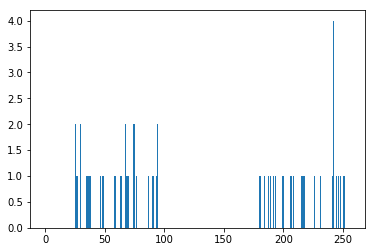

In [49]:
X = np.random.randint(25,50,(25,2))
Y = np.random.randint(60,85,(25,2))
Z = np.vstack((X,Y))
# z = np.asfarray 얘는 float64밖에 안되므로 못쓴다.

# convert to np.float32
Z = np.float32(z) # 인스턴스 방식(객체를 하나 더 만드는 것)
# astype이 좀 더 효율적이다. 
plt.hist(Z,256,[0,256]),plt.show();

In [55]:
# CV2 criteria
[_ for _ in dir(cv2) if _.startswith('TERM_CRITERIA')]

['TERM_CRITERIA_COUNT', 'TERM_CRITERIA_EPS', 'TERM_CRITERIA_MAX_ITER']

In [19]:
getattr(cv2,'TERM_CRITERIA_COUNT')

1

In [56]:
# CV2 criteria
[_ for _ in dir(cv2) if _.startswith('KM')]

['KMEANS_PP_CENTERS', 'KMEANS_RANDOM_CENTERS', 'KMEANS_USE_INITIAL_LABELS']

In [46]:
# define criteria and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
ret,label,center=cv2.kmeans(Z,2,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
# (Z, cluster 개수, criteria, attempts, flags)
# flags: 초가값을 잡을 중심에 대한 플래그로로써 cv2.Center... 중 사용된다.
# KNN은 초기값 찾는게 중요하다.
# ret 할당 앞에 답이 있을 수록 간단하게 답이 나온다. 

In [47]:
center

array([[ 57.719997],
       [219.59999 ]], dtype=float32)

In [61]:
# Now separate the data, Note the flatten()
A = Z[label.ravel()==0]
B = Z[label.ravel()==1]

In [104]:
# Plot the data
plt.scatter(A[:,0],A[:,1])
plt.scatter(B[:,0],B[:,1],c = 'r')
plt.scatter(center[:,0],center[:,1],s = 80,c = 'y', marker = 's')
plt.xlabel('Height'),plt.ylabel('Weight')
plt.show()

IndexError: index 1 is out of bounds for axis 1 with size 1

In [ ]:
# DBscan : 가장 최고의 클러스터 개수를 찾아준다. 

In [65]:
from sklearn.datasets import load_iris

In [66]:
data = load_iris()

In [67]:
from sklearn.cluster import KMeans, DBSCAN

In [88]:
dbs = DBSCAN(min_samples=10)
# DBSCAN 해서 k를 찾으면 그 떄 knn를 한다. 
# t-sne (manifold -> 2차원상으로 줄이는 것)

In [150]:
dbs.fit_predict(data.data)

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1,
       -1,  1,  1, -1, -1, -1, -1, -1,  1,  1,  1, -1, -1,  1,  1, -1, -1,
       -1,  1, -1, -1,  1,  1, -1,  1,  1,  1, -1, -1, -1,  1,  1, -1, -1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1],
      dtype=int64)

In [90]:
vars(dbs)

{'eps': 0.5,
 'min_samples': 10,
 'metric': 'euclidean',
 'metric_params': None,
 'algorithm': 'auto',
 'leaf_size': 30,
 'p': None,
 'n_jobs': None,
 'core_sample_indices_': array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         16,  17,  19,  20,  21,  23,  25,  26,  27,  28,  29,  30,  31,
         34,  35,  36,  37,  38,  39,  40,  42,  43,  45,  46,  47,  48,
         49,  51,  54,  55,  61,  63,  67,  69,  71,  74,  78,  82,  83,
         86,  88,  89,  91,  92,  94,  95,  96,  97,  99, 104, 111, 112,
        116, 123, 126, 127, 138, 140, 147], dtype=int64),
 'labels_': array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
         1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1, 

In [84]:
import seaborn as sns 

In [85]:
iris = sns.load_dataset('iris')

In [91]:
# sns.pairplot(iris, hue ='species')

In [69]:
import mglearn

C:\Users\Cho Gyung Ah\AppData\Roaming\Python\Python37\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\Cho Gyung Ah\AppData\Roaming\Python\Python37\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


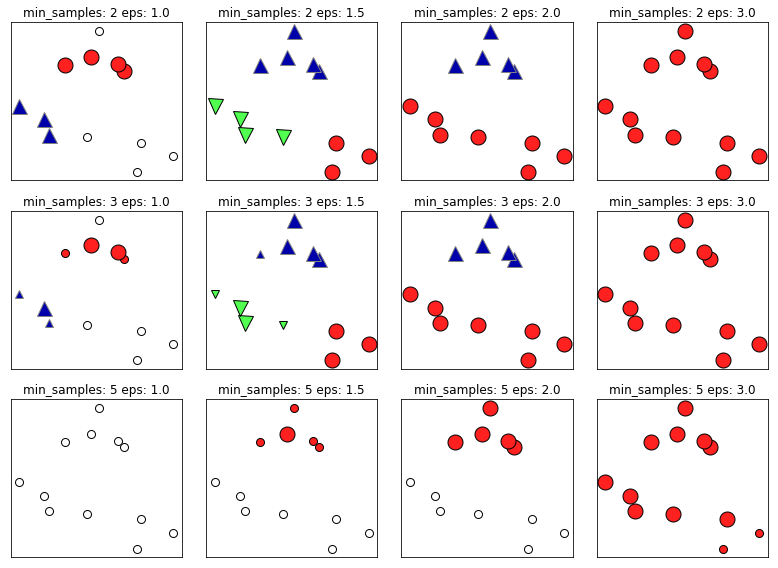

In [75]:
mglearn.plot_dbscan.plot_dbscan();

In [102]:
kme = KMeans(3)

In [103]:
kme.fit_predict(data.data)
# fit_transform : 중점 좌표를 중점으로 보는 것 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

- knn은 이상치에 크게 영향을 받는다. 따라서 normalization 쓴다. 
- min-max : 0과 1 사이로 줄어든다는 것은 크기 차이를 없애고 중요도 차이를 없앤다는 것이다. 
- 따라서 standard scaler를 더 많이 쓴다. 

- VGG16부터는 standard scaler로 쓴다. 

In [107]:
from sklearn.svm import SVC

In [108]:
svc = SVC()

In [109]:
svc.fit(data.data, data.target)

C:\Users\Cho Gyung Ah\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [ ]:
svc.predict([[3,3,3,3]])
# 차원을 증가시켜서 구분시켜주는 것 
# 하지만 차원의 저주때문에 별로 좋아하진 않음 
# 커널 트리 방식 
# 공간을 왜곡시키는 것 
# activation function

# 성능은 좋지만, 예측 속도가 늦기 때문에 잘 안쓴다. 
# 느리지만 정교해서 outlier detection 할 때 쓴다. 

In [121]:
import cv2

In [122]:
# cv는 sklearn 과 다르게 row/column으로 학습할 것인가 정해야한다. 
# dir 해서 set 찾아야한다.

# 왜 opencv ml 쓰지 말라고 한다? 
svm = cv2.ml.SVM_create()

In [129]:
[_ for _ in dir(svm) if _.startswith('set')]

['setC',
 'setClassWeights',
 'setCoef0',
 'setDegree',
 'setGamma',
 'setKernel',
 'setNu',
 'setP',
 'setTermCriteria',
 'setType']

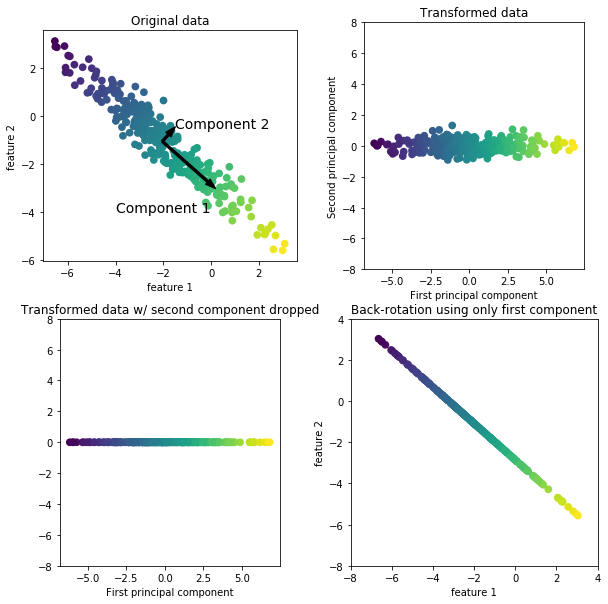

In [130]:
mglearn.plot_pca.plot_pca_illustration()

In [132]:
[_ for _ in dir(cv2) if _.startswith('PCA')]

['PCABackProject',
 'PCACompute',
 'PCACompute2',
 'PCAProject',
 'PCA_DATA_AS_COL',
 'PCA_DATA_AS_ROW',
 'PCA_USE_AVG']

In [ ]:
cv2.PCACompute()

##  Scikit-image
- 사용자들이 쉽게 접근할 수 있도록 한 것 

In [133]:
from scipy.ndimage import affine_transform

deep learning - correlation / poolib을 하지 않는다. (convolution 하지 않는다.) (?) 

In [134]:
# image util 은 오픈cv 편하게 하는 것 

In [144]:
import skimage
# 연구자들 용이라서 우아하다.

In [146]:
skimage.lookfor('contour')
# np.lookfor 와 비슷한 애 
# skimage 안에서만 찾아준다. 

Search results for 'contour'
----------------------------
skimage.measure.find_contours
    Find iso-valued contours in a 2D array for a given level value.
skimage.segmentation.active_contour
    Active contour model.
skimage.segmentation.chan_vese
    Chan-Vese segmentation algorithm.
skimage.segmentation.morphological_chan_vese
    Morphological Active Contours without Edges (MorphACWE)
skimage.segmentation.morphological_geodesic_active_contour
    Morphological Geodesic Active Contours (MorphGAC).
skimage.measure.regionprops
    Measure properties of labeled image regions.
skimage.measure.marching_cubes_classic
    Classic marching cubes algorithm to find surfaces in 3d volumetric data.
skimage.measure.marching_cubes_lewiner
    Lewiner marching cubes algorithm to find surfaces in 3d volumetric data.
skimage.segmentation.inverse_gaussian_gradient
    Inverse of gradient magnitude.

In [148]:
np.info(skimage.measure.find_contours)

 find_contours(array, level, fully_connected='low',
               positive_orientation='low')

Find iso-valued contours in a 2D array for a given level value.

Uses the "marching squares" method to compute a the iso-valued contours of
the input 2D array for a particular level value. Array values are linearly
interpolated to provide better precision for the output contours.

Parameters
----------
array : 2D ndarray of double
    Input data in which to find contours.
level : float
    Value along which to find contours in the array.
fully_connected : str, {'low', 'high'}
     Indicates whether array elements below the given level value are to be
     considered fully-connected (and hence elements above the value will
     only be face connected), or vice-versa. (See notes below for details.)
positive_orientation : either 'low' or 'high'
     Indicates whether the output contours will produce positively-oriented
     polygons around islands of low- or high-valued elements. If 'low' then


In [173]:
from skimage import io

In [174]:
im = io.imread('icon.png')

In [176]:
im.shape

(1854, 1473, 4)

In [179]:
import matplotlib.pyplot as plt

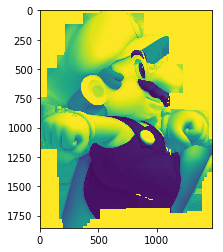

In [181]:
plt.imshow(im[:,:,0])

In [182]:
import cv2 

In [191]:
temp = [_ for _ in dir(cv2) if _.startswith('IMREAD')]

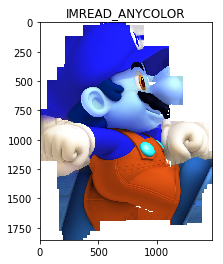

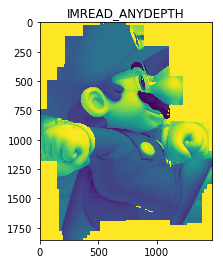

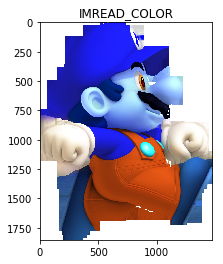

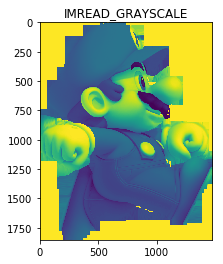

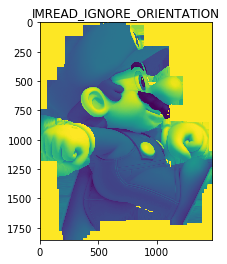

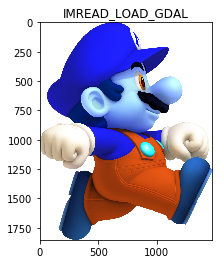

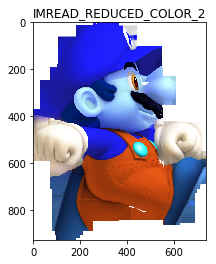

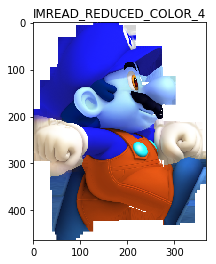

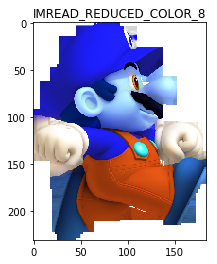

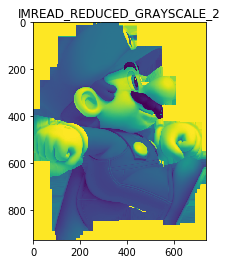

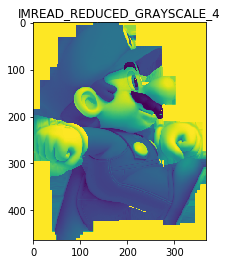

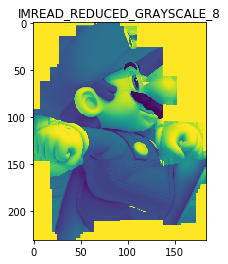

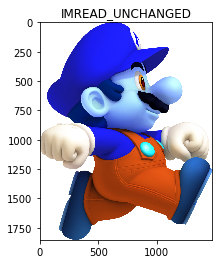

In [201]:
for i in temp:
    fig = plt.figure()
    plt.imshow(cv2.imread('icon.png', getattr(cv2, i )))
    plt.title(i)

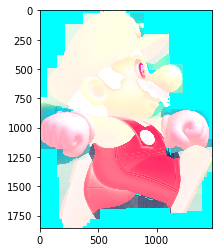

In [221]:
a = cv2.imread('icon.png', cv2.IMREAD_UNCHANGED)
plt.imshow(a[:,:,::-1])
# 투명도 없애고 불러오는 옵션이 있다.
# cv는 설명서가 없어서 다 암기 또는 comprehension이용해서 찾아한다. 

In [ ]:
io.image_stack

In [207]:
from skimage import data, data_dir

In [208]:
data_dir

# ogrid/ esinsum/ 회전행렬 -> 원그리기 

'C:\\Users\\Cho Gyung Ah\\Anaconda3\\lib\\site-packages\\skimage\\data'

In [210]:
data.astronaut()

array([[[154, 147, 151],
        [109, 103, 124],
        [ 63,  58, 102],
        ...,
        [127, 120, 115],
        [120, 117, 106],
        [125, 119, 110]],

       [[177, 171, 171],
        [144, 141, 143],
        [113, 114, 124],
        ...,
        [127, 118, 112],
        [124, 115, 108],
        [121, 116, 105]],

       [[201, 194, 193],
        [182, 178, 175],
        [168, 165, 164],
        ...,
        [128, 120, 117],
        [126, 116, 112],
        [124, 114, 109]],

       ...,

       [[186, 170, 176],
        [186, 170, 177],
        [183, 168, 170],
        ...,
        [  0,   0,   0],
        [  0,   0,   1],
        [  0,   0,   0]],

       [[183, 169, 170],
        [182, 167, 171],
        [185, 164, 176],
        ...,
        [  0,   0,   1],
        [  1,   1,   1],
        [  0,   0,   0]],

       [[184, 167, 172],
        [183, 165, 169],
        [180, 162, 171],
        ...,
        [  0,   0,   0],
        [  1,   1,   1],
        [  0,   0,   0]]

In [ ]:
from skimage.color import adapt_rgb

In [222]:
from skimage.color.adapt_rgb import adapt_rgb, each_channel, hsv_value
from skimage import filters


@adapt_rgb(each_channel)
def sobel_each(image):
    return filters.sobel(image)


@adapt_rgb(hsv_value)
def sobel_hsv(image):
    return filters.sobel(image)

Text(0.5, 1.0, 'Sobel filter computed\n on (V)alue converted image (HSV)')

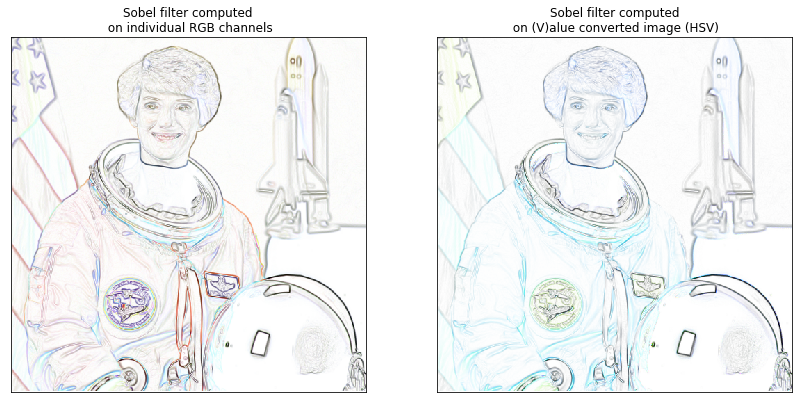

In [223]:
from skimage import data
from skimage.exposure import rescale_intensity
import matplotlib.pyplot as plt

image = data.astronaut()

fig, (ax_each, ax_hsv) = plt.subplots(ncols=2, figsize=(14, 7))

# We use 1 - sobel_each(image) but this won't work if image is not normalized
ax_each.imshow(rescale_intensity(1 - sobel_each(image)))
ax_each.set_xticks([]), ax_each.set_yticks([])
ax_each.set_title("Sobel filter computed\n on individual RGB channels")

# We use 1 - sobel_hsv(image) but this won't work if image is not normalized
ax_hsv.imshow(rescale_intensity(1 - sobel_hsv(image)))
ax_hsv.set_xticks([]), ax_hsv.set_yticks([])
ax_hsv.set_title("Sobel filter computed\n on (V)alue converted image (HSV)")

In [ ]:
# tensorflow doc

In [78]:
2 + 5 + 5 + 4

16